In [1]:
import pandas as pd
from pathlib import Path

# Part 1: Prepare the Data

In [2]:
#Load data into DataFrame
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
#Dropping "MYOPIC" column from dataset
df.drop(['MYOPIC'], axis = 1, inplace = True)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#Standardizing dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['AGE','SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']])


# Part 2: Apply Dimensionality Reduction

In [6]:
# Perform Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

pca_transformed_data = pca.fit_transform(scaled_data)

pca_transformed_data.shape

(618, 10)

In [7]:
#Further reduce the dataset with t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=35)

tsne_features = tsne.fit_transform(pca_transformed_data)

tsne_features.shape


C:\Users\ericb\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

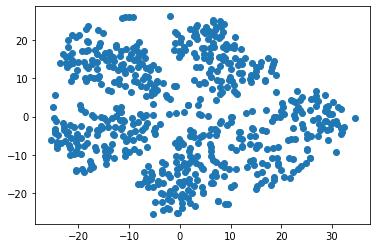

There are not any obviously distinct clusters


In [9]:
#Create a scatterplot of t-SNE ouput
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0],tsne_features[:,1])
plt.show()

print('There are not any obviously distinct clusters')

# Part 3: Perform a Cluster Analysis with K-means

In [10]:
# Avoiding memory leak on windows machine
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [11]:
from sklearn.cluster import KMeans

reduced_df = pd.DataFrame(data=tsne_features, columns = ['Principal Component 1', 'Principal Component 2'])

reduced_df.head()

,Principal Component 1,Principal Component 2
0,15.232949,-18.159851
1,1.154156,-12.746647
2,-12.073341,9.741687
3,9.452515,-22.853598
4,8.247316,6.375319


In [12]:
inertia = []

k = list(range(1,10))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(reduced_df)
    inertia.append(km.inertia_)
    
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\ericb\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,235314.906250
1,2,135044.312500
2,3,83725.593750
3,4,58161.613281
4,5,38550.820312


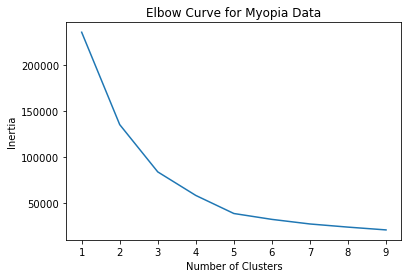

In [13]:
plt.plot(df_elbow['k'],df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Myopia Data')
plt.show()

There is no distinct elbow, therefore; my recommendation is that patients cannot be clustered.